In [9]:
from sys import path
from os import listdir
from typing import List

from pandas import DataFrame, read_csv, concat

path.append("..")
from utils.logger import Logger

In [10]:
logger = Logger()


def gerar_tabela_paic_silver_unificada() -> DataFrame:
    arquivos_de_entrada = criar_lista_de_arquivos_silver()
    tabelas_paic = []
    for arquivo in arquivos_de_entrada:
        tabela_paic = extrair_tabela_paic_silver(
            nome_da_tabela=arquivo)
        tabela_paic.loc[:, ("pesquisa")] = arquivo
        tabelas_paic.append(tabela_paic)
    return concat(objs=tabelas_paic)


def criar_lista_de_arquivos_silver() -> List[str]:
    """
    Gera a listagem de arquivos silver
    """
    logger.log_mensagem(
        mensagem="Criando lista de arquivos a serem processados")
    lista_arquivos_a_serem_processados = []
    lista_arquivos_silver = listdir(
        path=f"../../dados/silver")    
    for arquivo in lista_arquivos_silver:
        lista_arquivos_a_serem_processados.append(
            arquivo.replace(".csv", ""))
    return lista_arquivos_a_serem_processados


def extrair_tabela_paic_silver(nome_da_tabela: str) -> DataFrame:
    """
    Lê a tabela localizada no diretório da camada silver
    """
    logger.log_mensagem(
        mensagem=f"Lendo a tabela silver {nome_da_tabela}")
    caminho = f"../../dados/silver/{nome_da_tabela}.csv"
    dtype = {
        "ano_pesquisa": int,
        "variavel": str,
        "codigo_cnae": str,
        "categoria_empresa": str,
        "valor": int,
        "unidade": str,
        "pesquisa":str}
    tabela_paic = read_csv(filepath_or_buffer=caminho, sep=";", dtype=dtype)
    return tabela_paic

In [11]:
tabela_paic_silver_unificada = gerar_tabela_paic_silver_unificada()

2022-10-07 23:42:40.711787 - Criando lista de arquivos a serem processados
2022-10-07 23:42:40.711787 - Lendo a tabela silver consumo_total_material_de_construcao
2022-10-07 23:42:40.716286 - Lendo a tabela silver emprego_e_salario
2022-10-07 23:42:40.721272 - Lendo a tabela silver estrutura_das_despesas
2022-10-07 23:42:40.730248 - Lendo a tabela silver estrutura_das_receitas
2022-10-07 23:42:40.735239 - Lendo a tabela silver estrutura_dos_investimentos
2022-10-07 23:42:40.742219 - Lendo a tabela silver estrutura_do_valor_bruto
2022-10-07 23:42:40.751197 - Lendo a tabela silver gasto_de_pessoal


#### Total de linhas por pesquisa

<AxesSubplot: title={'center': 'Total de linhas por pesquisa'}, ylabel='pesquisa'>

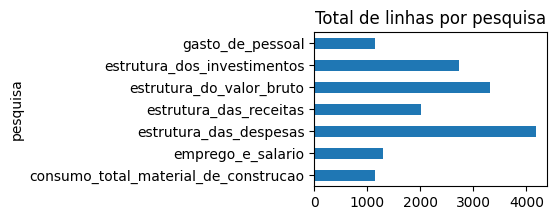

In [12]:
(tabela_paic_silver_unificada
    .groupby(by=["pesquisa"])["pesquisa"]
    .agg(func="count")
    .plot(
        kind="barh",
        title="Total de linhas por pesquisa",
        figsize=(3, 2),
        sort_columns=True))

#### Total de valores nulos por coluna

In [13]:
tabela_paic_silver_unificada.isnull().sum()

ano_pesquisa         0
variavel             0
codigo_cnae          0
categoria_empresa    0
valor                0
unidade              0
pesquisa             0
dtype: int64

#### Relação de linhas duplicadas

In [14]:
colunas = [
    "ano_pesquisa", "variavel", "codigo_cnae", "categoria_empresa",
    "valor", "unidade", "pesquisa"]
tabela_paic_silver_unificada.loc[:, ("linha_duplicada")] = (
    tabela_paic_silver_unificada
    .duplicated(subset=colunas))

<AxesSubplot: title={'center': 'Relação de linhas duplicadas'}>

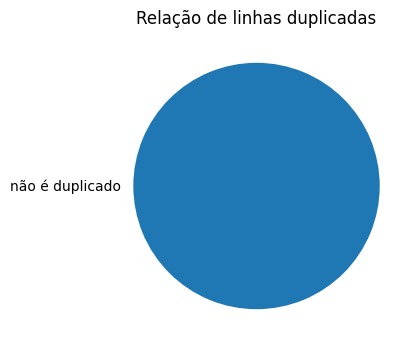

In [15]:
(tabela_paic_silver_unificada
    .groupby(by=["linha_duplicada"])["linha_duplicada"]
    .agg(func="count")
    .plot(
        kind="pie",
        title="Relação de linhas duplicadas",
        labels=["não é duplicado", "é duplicado"],
        figsize=(4, 4),
        ylabel=""))